<a href="https://colab.research.google.com/github/nitishmagendran/ESPSubmissions/blob/main/Diabetic_Retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
5  0083ee8054ee          4
6  0097f532ac9f          0
7  00a8624548a9          2
8  00b74780d31d          2
9  00cb6555d108          1


In [ ]:

train_dir = './gdrive/My Drive/Datasets/fundus/resized_train_cropped/Train'
valid_dir = './gdrive/My Drive/Datasets/fundus/resized_train_cropped/Validate'
test_dir = './gdrive/My Drive/Datasets/fundus/resized_train_cropped/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory( train_dir,
                                                    target_size = (299,299),
                                                    batch_size = 20,
                                                    class_mode = 'sparse')
train_generator.class_indices

Found 4053 images belonging to 5 classes.


{'level_0': 0, 'level_1': 1, 'level_2': 2, 'level_3': 3, 'level_4': 4}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = val_datagen.flow_from_directory(valid_dir,
                                                       target_size = (299,299),
                                                       batch_size = 20,
                                                       class_mode = 'sparse')
validation_generator.class_indices

Found 4068 images belonging to 5 classes.


{'level_0': 0, 'level_1': 1, 'level_2': 2, 'level_3': 3, 'level_4': 4}

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
conv_base = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (299,299,3))
conv_base.summary()

87916544/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'conv2d_93':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation = 'relu'))
model.add(tf.keras.layers.Dense(5,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               33554688  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 55,358,757
Trainable params: 33,949,701
Non-trainable params: 21,409,056
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate =1e-5),
              metrics = ['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=10,
                              epochs = 200,
                              validation_data = validation_generator,
                              validation_steps = 8)

Epoch 1/200
10/10 [==============================] - 81s 8s/step - loss: 1.4728 - accuracy: 0.3575 - val_loss: 1.3601 - val_accuracy: 0.3875
Epoch 2/200
10/10 [==============================] - 82s 8s/step - loss: 1.4644 - accuracy: 0.3200 - val_loss: 1.3468 - val_accuracy: 0.4062
Epoch 3/200
10/10 [==============================] - 82s 8s/step - loss: 1.3650 - accuracy: 0.4100 - val_loss: 1.4633 - val_accuracy: 0.3378
Epoch 4/200
10/10 [==============================] - 79s 8s/step - loss: 1.4237 - accuracy: 0.3550 - val_loss: 1.4365 - val_accuracy: 0.3500
Epoch 5/200
10/10 [==============================] - 80s 8s/step - loss: 1.4260 - accuracy: 0.3300 - val_loss: 1.4155 - val_accuracy: 0.3500
Epoch 6/200
10/10 [==============================] - 78s 8s/step - loss: 1.3912 - accuracy: 0.3700 - val_loss: 1.3518 - val_accuracy: 0.3938
Epoch 7/200
10/10 [==============================] - 78s 8s/step - loss: 1.3890 - accuracy: 0.3550 - val_loss: 1.4031 - val_accuracy: 0.3812
Epoch 8/200
1

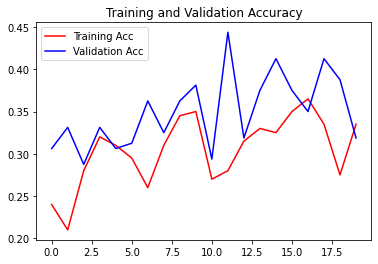

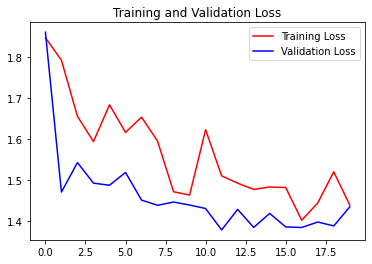

In [ ]:
model.save('retinopathy3.h5')

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [ ]:
test_dir = './gdrive/My Drive/gaussian_filtered_images'
test_datagen= ImageDataGenerator(rescale= 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (299,299),
    batch_size = 20,
    class_mode = 'sparse')

test_loss, test_acc = model.evaluate_generator(test_generator,steps = 50)
print('Test Accuracy on images: ', test_acc)

Found 3662 images belonging to 5 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
Test Accuracy on images:  0.6830000281333923


In [ ]:
from keras.preprocessing import image
image_pred = image.load_img('./gdrive/My Drive/Datasets/fundus/resized_train_cropped/Validate/level_1/17_right.jpeg',target_size = (299,299))
image_pred = image.img_to_array(image_pred)
image_pred = np.expand_dims(image_pred, axis = 0)
rest = model.predict(image_pred)
print(rest)

[[7.8222024e-19 9.9999189e-01 8.1371463e-06 1.5497668e-18 9.8558336e-13]]
